In [27]:
import sys
import os

os.listdir('tsetlin_results')

['skb_trainsize_5000_0_NFEAT_1000_epoch_32_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_48_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_1_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_16_predictions.npy',
 'imdb_noiselevels_T8015868.csv',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_24_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_19_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_47_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_40_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_23_predictions.npy',
 'IMDBExperiment.py',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_9_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_11_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_6_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_35_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_41_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000_epoch_8_predictions.npy',
 'skb_trainsize_5000_0_NFEAT_1000

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

results_df1 = pd.read_csv('tsetlin_results/imdb_noiselevels_T8015868.csv')
results_df2 = pd.read_csv('tsetlin_results/imdb_noiselevels_T80_1000c_27397.csv')
results_df = pd.concat([results_df, results_df2])

In [30]:
result_dfs = list(results_df.groupby(['epoch', 's', 'num_clauses', 
                    'num_states', 'noise_level']).mean().reset_index().groupby(['s', 'num_clauses', 
                                                                                'num_states', 'noise_level']))

## Summary of Results of All Parameters

In [31]:
summary_df = results_df[results_df['epoch']>40].groupby(['s', 'num_clauses', 
                                            'num_states', 'noise_level']).mean().reset_index()[['s', 'num_clauses', 
                                            'num_states', 'noise_level', 'accuracy']]#.sort_values('accuracy')


In [32]:
colnames_str = "Accuracy & s & Number of States & Number of Clauses \\\ \\hline \\hline \n"

In [33]:
full_table_str = colnames_str
for idx, row in summary_df.iterrows():
    if row['noise_level'] == 0.3:
        row_str = str(row['accuracy'])[0:5]+" & "+str(row['s'])+" & "+\
        str(row['num_states'])+" & "+str(row['num_clauses'])+" \\\ \\hline \n"
        full_table_str = full_table_str + row_str
        
print(full_table_str)
# with open("full_param_results_30.txt", "w") as text_file:
#     text_file.write(full_table_str)

Accuracy & s & Number of States & Number of Clauses \\ \hline \hline 
50.42 & 3.0 & 16.0 & 100.0 \\ \hline 
51.43 & 3.0 & 256.0 & 100.0 \\ \hline 
50.46 & 30.0 & 16.0 & 100.0 \\ \hline 
52.21 & 30.0 & 256.0 & 100.0 \\ \hline 
51.24 & 300.0 & 16.0 & 100.0 \\ \hline 
51.60 & 300.0 & 256.0 & 100.0 \\ \hline 



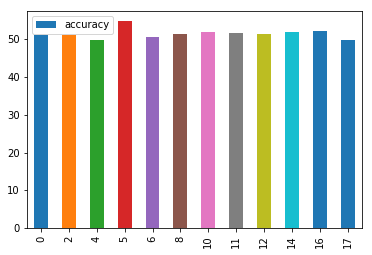

In [34]:
summary_df[summary_df['noise_level']==0].plot.bar(y='accuracy')
plt.show()

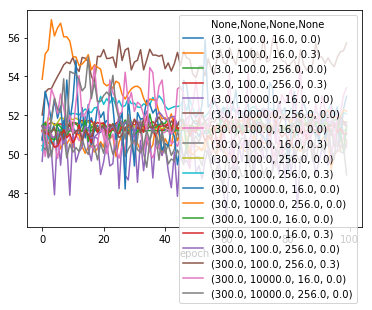

In [35]:
ax1 = None
ax2 = None
for vals, result_df in result_dfs:
    if vals[3] == 0.15:
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label=vals)
        else:
            result_df.plot(x='epoch', y='accuracy', label=vals, ax=ax1)
    else:
        if ax2 == None:
            ax2 = result_df.plot(x='epoch', y='accuracy', label=vals)
        else:
            result_df.plot(x='epoch', y='accuracy', label=vals, ax=ax2)
plt.show()

## View Effect of Noise Levels

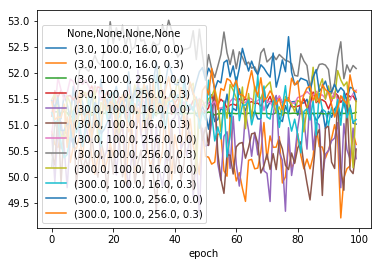

In [36]:
ax1 = None
ax2 = None
for vals, result_df in result_dfs:
    if vals[1] == 100:
        if vals[3] == 0.15:
            if ax1 == None:
                ax1 = result_df.plot(x='epoch', y='accuracy', label=vals)
            else:
                result_df.plot(x='epoch', y='accuracy', label=vals, ax=ax1)
        else:
            if ax2 == None:
                ax2 = result_df.plot(x='epoch', y='accuracy', label=vals)
            else:
                result_df.plot(x='epoch', y='accuracy', label=vals, ax=ax2)
plt.show()

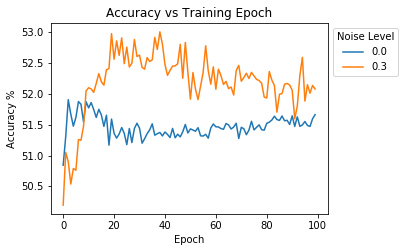

In [37]:
ax1 = None
for vals, result_df in result_dfs:
    if (vals[1] == 100) and (vals[0] == 30) and (vals[2] == 256):
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label=vals[3])
        else:
            result_df.plot(x='epoch', y='accuracy', label=vals[3], ax=ax1)
plt.legend(bbox_to_anchor=(1,1), title="Noise Level")     
plt.title("Accuracy vs Training Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.tight_layout(rect=[0,0.1,0.8,1])
plt.savefig("accvsepoch.eps")
plt.show()

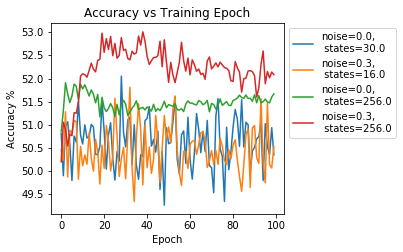

In [38]:
ax1 = None
for vals, result_df in result_dfs:
    #if (vals[1] == 10) and (vals[0] == 3) and (vals[2] == 256):
    if (vals[0] == 30) and (vals[1] == 100):
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label="noise="+str(vals[3])+",\n states="+str(vals[0]))
        else:
            result_df.plot(x='epoch', y='accuracy', label="noise="+str(vals[3])+",\n states="+str(vals[2]), ax=ax1)
plt.legend(bbox_to_anchor=(1,1))   
plt.title("Accuracy vs Training Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.tight_layout(rect=[0,0.1,0.7,1])
plt.savefig("nstates_accvsepoch.eps")
plt.show()

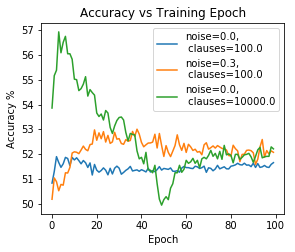

In [39]:
ax1 = None
for vals, result_df in result_dfs:
    #if (vals[1] == 10) and (vals[0] == 3) and (vals[2] == 256):
    if (vals[0] == 30) and (vals[2] == 256):
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label="noise="+str(vals[3])+",\n clauses="+str(vals[1]))
        else:
            result_df.plot(x='epoch', y='accuracy', label="noise="+str(vals[3])+",\n clauses="+str(vals[1]), ax=ax1)
plt.legend(bbox_to_anchor=(1,1))   
plt.title("Accuracy vs Training Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.tight_layout(rect=[0,0.1,0.7,1])
plt.savefig("nclauses_accvsepoch.eps")
plt.show()

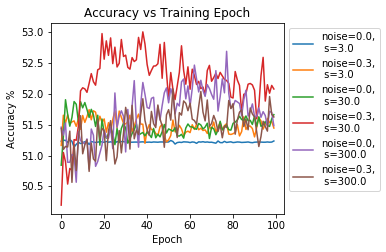

In [40]:
ax1 = None
for vals, result_df in result_dfs:
    #if (vals[1] == 10) and (vals[0] == 3) and (vals[2] == 256):
    if (vals[1] == 100) and (vals[2] == 256):
        if ax1 == None:
            ax1 = result_df.plot(x='epoch', y='accuracy', label="noise="+str(vals[3])+",\n s="+str(vals[0]))
        else:
            result_df.plot(x='epoch', y='accuracy', label="noise="+str(vals[3])+",\n s="+str(vals[0]), ax=ax1)
plt.legend(bbox_to_anchor=(1,1))   
plt.title("Accuracy vs Training Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.tight_layout(rect=[0,0.1,0.7,1])
plt.savefig("s_accvsepoch.eps")
plt.show()

## View Average Effect of Parameters

In [41]:
fixed_params = {'num_clauses': 100,
               's': 30,
               'num_states': 256}
param_names = {'num_clauses': "Number of Clauses",
              'num_states': "Number of States",
              's': 's'}


def plot_param_effect(summary_df, param_name):
    secondary_params = [param for param in fixed_params.keys() if param != param_name]
    dfs = list(summary_df[summary_df['noise_level']==0.3].groupby(secondary_params))
    new_dfs = []
    for vals, df in dfs:
        df = df.sort_values(param_name)
        param_dict = {df.loc[idx, param_name]: [df.loc[idx, 'accuracy']] for idx in df.index}
        param_dict[secondary_params[0]] = [vals[0]]
        param_dict[secondary_params[1]] = [vals[1]]
        new_df = pd.DataFrame(param_dict)
        new_dfs.append(new_df)
    df_concat = pd.concat(new_dfs)
    
    # plot for first vs second param
    for secondary_param in secondary_params:
        secondary_param_name = param_names[secondary_param]
        third_param = [param for param in secondary_params if param != secondary_param][0]
        df_concat.loc[df_concat[third_param] == fixed_params[third_param], 
                      [coln for coln in df_concat.columns if coln != third_param]].plot.bar(x=secondary_param)
        plt.ylabel('Accuracy %')
        plt.xlabel(secondary_param_name)
        plt.title("Effect of Parameters:\n"+str(param_names[param_name])+" and "+str(secondary_param_name))
        plt.legend(bbox_to_anchor=(1,1), title=param_names[param_name])
        plt.tight_layout(rect=[0,0.1,0.7,1])
        plt.savefig(param_name+"_"+secondary_param+".eps")
        plt.show()

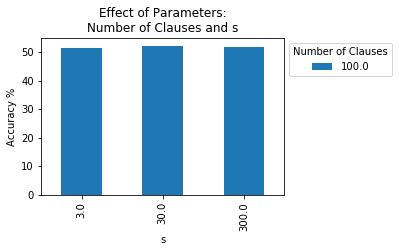

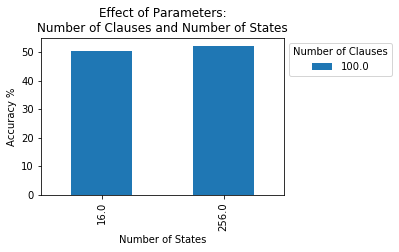

In [42]:
plot_param_effect(summary_df, 'num_clauses')

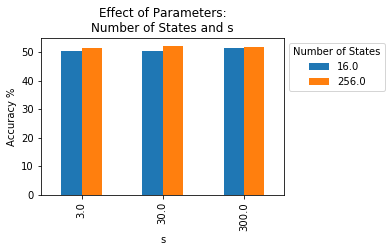

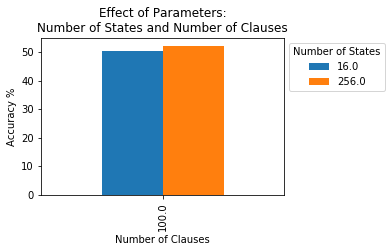

In [43]:
plot_param_effect(summary_df, 'num_states')